In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import numpy as np
import scipy.stats as stats
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

from bgspy.genome import Genome
from bgspy.data import GenomeData, get_accessible_from_seqs

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200

In [4]:
g = Genome('hg38', seqlens_file="../data/annotation/hg38_seqlens.tsv", chroms=['chr1', 'chr10'])
g.load_annot("../data/annotation/conserved_phastcons_thresh0.bed.gz")
g.load_recmap("../data/annotation/hapmap_genetic_map.txt")

load_bed_annotation(): ignored chr11, chr6, chr20, chr16, chr3, chr5, chr17, chr14, chr2, chr4, chrY, chr13, chr19, chr18, chr12, chrX, chr8, chr15, chr21, chr9, chr22, chr7
ignoring HapMap header...
parsing recmap as HapMap formatted (chrom, end, rate)
RecMap._readmap() ignored chr11, chr6, chr20, chr16, chr3, chr5, chr17, chr14, chr2, chr4, chr13, chr19, chr18, chr12, chrX, chr8, chr15, chr21, chr9, chr22, chr7


In [5]:
gd = GenomeData(g)
gd.load_counts_dir('../data/hg1k_counts/')
gd.load_neutral_masks('../data/annotation/neutral_phastcons_genes_with_introns.bed.gz')
gd.load_accessibile_masks('../data/annotation/no_centro.bed')

In [36]:
g.seqlens

{'chr1': 248956422}

In [37]:
gd.stats()

{'chr1': (0.6437420642235934, 0.9783094569056748)}

In [38]:
gd.load_fasta('../data/annotation/hg38.fa.gz')

In [39]:
np.logspace(-10, np.log10(), 6)

array([1.00000000e-10, 3.16227766e-10, 1.00000000e-09, 3.16227766e-09,
       1.00000000e-08, 3.16227766e-08])

In [41]:
np.sqrt(1e-8 * 1e-7)

3.162277660168379e-08

In [33]:
10**3.16227766

1453.0403013356877

In [39]:
gd.stats()

{'chr1': (0.6437420642235934, 0.9783094569056748)}

In [125]:
bins, pi = gd.bin_pi(width=1e6, filter_neutral=True, filter_accessible=True)
bins_alt, pi_alt = gd.bin_pi(width=1e6, filter_neutral=True, filter_accessible=True)

In [57]:
dalt = pd.read_csv('../data/all_pidxy_win-size_1000000_merged-mask_True_state_all_curr_all.tsv', sep='\t')
dalt['midpoint'] = (dalt.start + dalt.end)/2
dalt_pi = dalt.loc[(dalt.stat == 'pi') & (dalt.spp1 == 'homo')]

In [58]:
dalt_pi.head()

,value,stat,spp1,spp2,chr,start,end,n_acc_bases,n_snps,midpoint
13392,NaN,pi,homo,homo,chr1,1,1000000,0,0,500000.5
13393,0.000887,pi,homo,homo,chr1,1000001,2000000,283857,1109,1500000.5
13394,0.001038,pi,homo,homo,chr1,2000001,3000000,455783,1995,2500000.5
13395,0.001348,pi,homo,homo,chr1,3000001,4000000,570312,3066,3500000.5
13396,0.001300,pi,homo,homo,chr1,4000001,5000000,794579,4005,4500000.5


In [59]:
md = pd.read_csv('../data/murphy_digitized.csv', names=('pos', 'pi'))

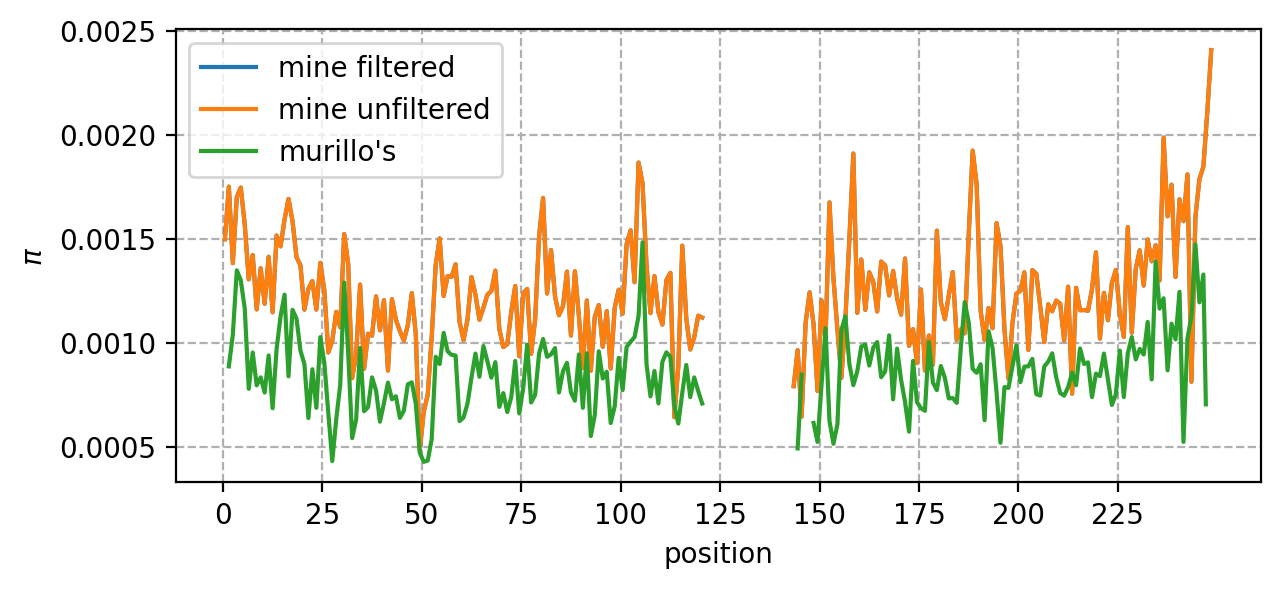

In [60]:
fig, ax = plt.subplots(figsize=(7, 3))

x, y = pi['chr1'].pairs
ax.plot(x/1e6, y, label='mine filtered')

x, y = pi_alt['chr1'].pairs
ax.plot(x/1e6, y, label='mine unfiltered')

dalt_pi_chr1 = dalt_pi.loc[dalt_pi.chr == 'chr1']
ax.plot(dalt_pi_chr1.midpoint/1e6, dalt_pi_chr1.value, label="murillo's")
grid = np.arange(0, 250, 25)
ax.set_xticks(grid)
ax.set_xlabel('position')
ax.set_ylabel('$\pi$')
ax.legend()
ax.grid(linestyle='dashed')

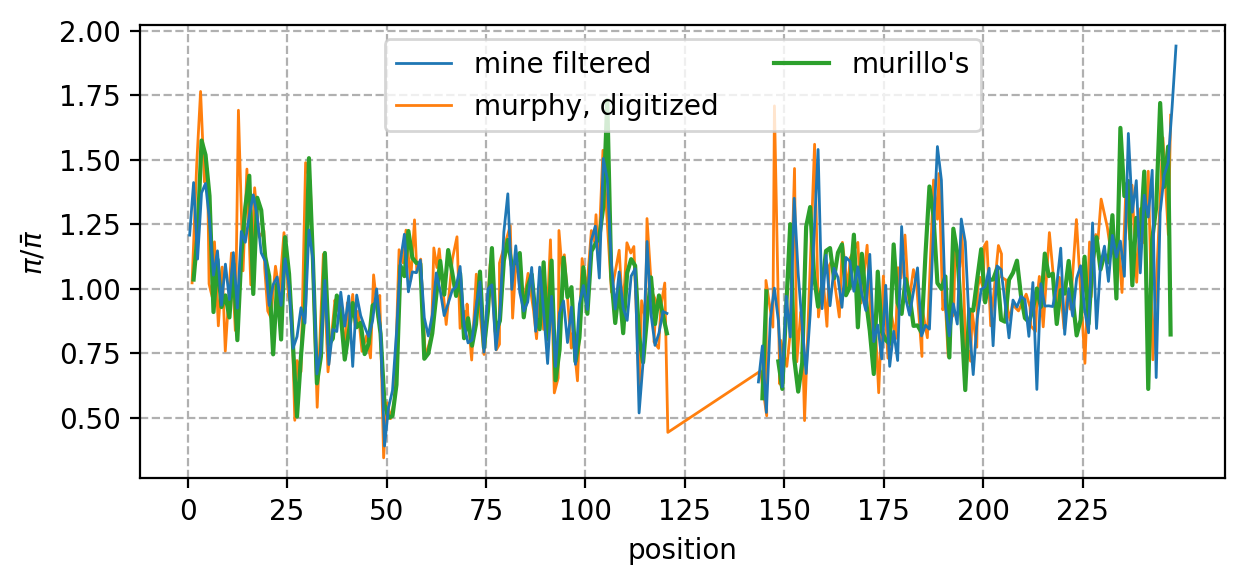

In [61]:

def ratio(x):
    return x/np.nanmean(x)

fig, ax = plt.subplots(figsize=(7, 3))

x, y = pi['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='mine filtered', zorder=3, linewidth=1)
#ax.scatter(x/1e6, ratio(y), c=pi['chr1'].n[1:] < 5e3, zorder=3, linewidth=1)

x, y = pi_alt['chr1'].pairs
#ax.plot(x/1e6, ratio(y), label='mine unfiltered')

ax.plot(md['pos'], ratio(md['pi']), label='murphy, digitized', linewidth=1)

dalt_pi_chr1 = dalt_pi.loc[dalt_pi.chr == 'chr1']
ax.plot(dalt_pi_chr1.midpoint/1e6, ratio(dalt_pi_chr1.value), label="murillo's")
grid = np.arange(0, 250, 25)
ax.set_xticks(grid)
ax.set_xlabel('position')
ax.set_ylabel('$\pi/\\bar{\pi}$')
ax.legend(ncol=2)
ax.grid(linestyle='dashed')

In [105]:
bins_100kb, pi_100kb = gd.bin_pi(width=5e5, filter_neutral=True, filter_accessible=True)

In [182]:
gd_sims = GenomeData(g)
gd_sims.load_dac_file('../data/chrombgs_chr10_thresh0_N1000_mu1e-08_sh0.01_chr10_seed1006500984_rep67_dac.tsv.gz')

In [183]:
a = gd_sims.bin_pi(1e6, False, False)

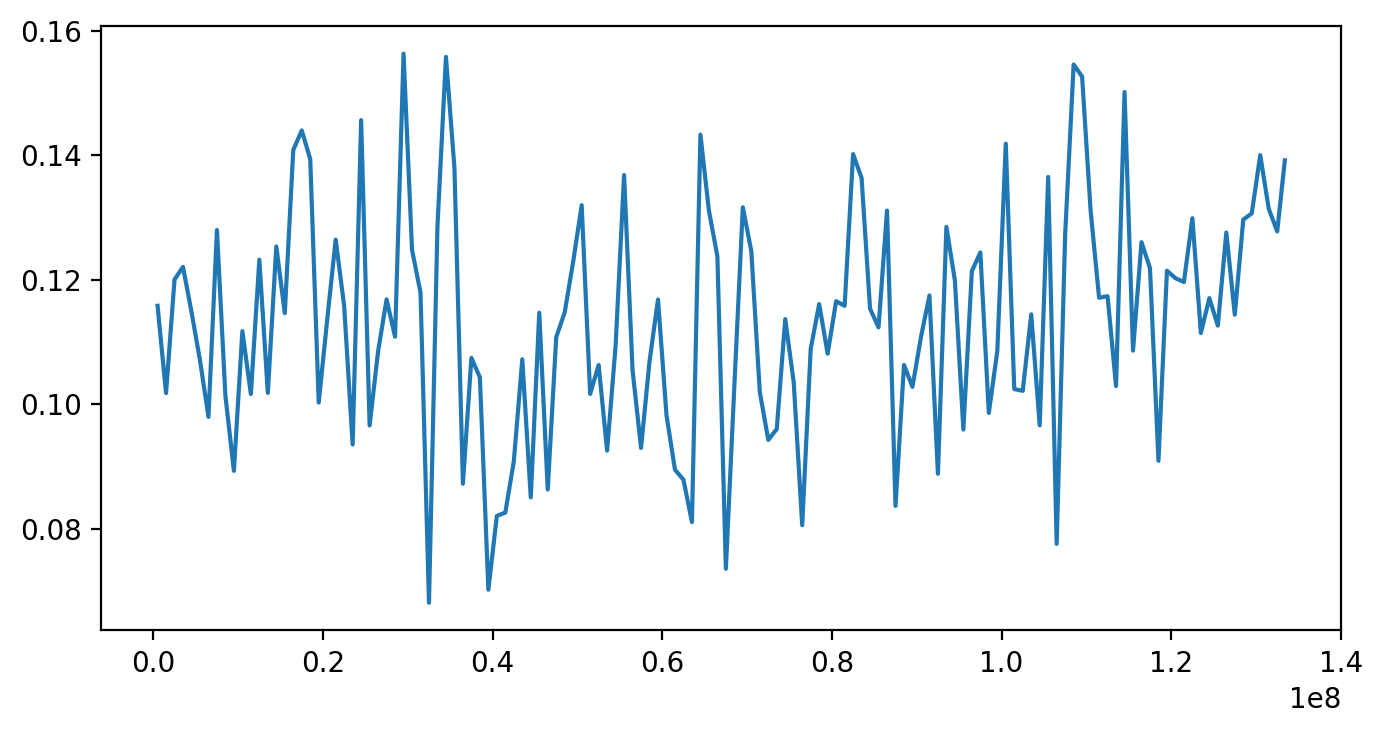

In [185]:
x, y = a[1]['chr10'].pairs
mu = 1.5e-8
plt.plot(x, y)
#plt.axhline(4*1000*mu, c='0.22', linestyle='dashed')

In [5]:
from bgspy.sim_utils import count_derived_from_ts

In [6]:
import tskit
import msprime
ts = tskit.load('../data/chrombgs_chr10_thresh0_N1000_mu1e-08_sh0.01_chr10_seed1006500984_rep67_treeseq.tree')
ts = ts.delete_sites([m.site for m in ts.mutations()])

In [10]:
rts = msprime.sim_mutations(ts, rate=1e-7, discrete_genome=True, model=msprime.BinaryMutationModel())

In [ ]:
d = count_derived_from_ts(rts)

In [ ]:
d

In [14]:
next(rts.variants()).site

Site(id=0, position=594.0, ancestral_state='0', mutations=[Mutation(id=0, site=0, node=22079, derived_state='1', parent=-1, metadata={'mutation_list': []}, time=1244.1271109580994, edge=165708)], metadata=b'')

In [13]:
var.site.position

NameError: name 'var' is not defined

In [14]:
d

DAC(pos=array([0, 0, 0, ..., 0, 0, 0]), nderiv=array([5.52000000e+02, 9.45000000e+02, 1.01500000e+03, ...,
       1.33796761e+08, 1.33797048e+08, 1.33797134e+08]), ntotal=array([2000, 2000, 2000, ..., 2000, 2000, 2000]))

In [8]:
next(rts.variants()).site.position

476.0

In [121]:
d.pos.mean()

0.0

In [180]:
fix_bins = np.copy(bins['chr10'])
fix_bins[-1] = fix_bins[-1]+1

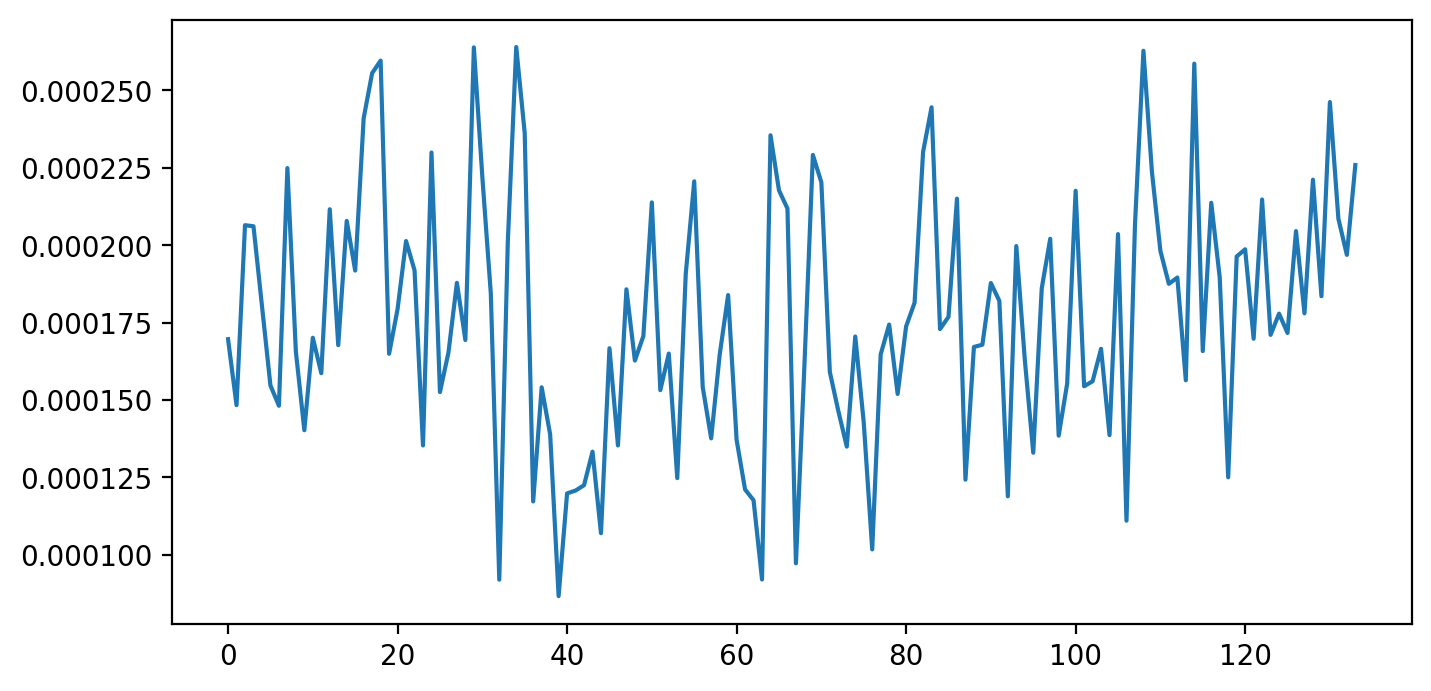

In [181]:
plt.plot(rts.diversity(windows=fix_bins, mode='branch') * 1e-7/2)

In [114]:
gd.npoly()

{'chr1': 137839161}

In [173]:
gd_sims.npoly(False, False)

{'chr1': 0, 'chr10': 1241936}

In [78]:
bin_sims, pi_sims = gd_sims.bin_pi(1e6, False, False)

/tmp/ipykernel_39110/1463136580.py:2: RuntimeWarning: Mean of empty slice
  return x/np.nanmean(x)


(0.0, 3.0)

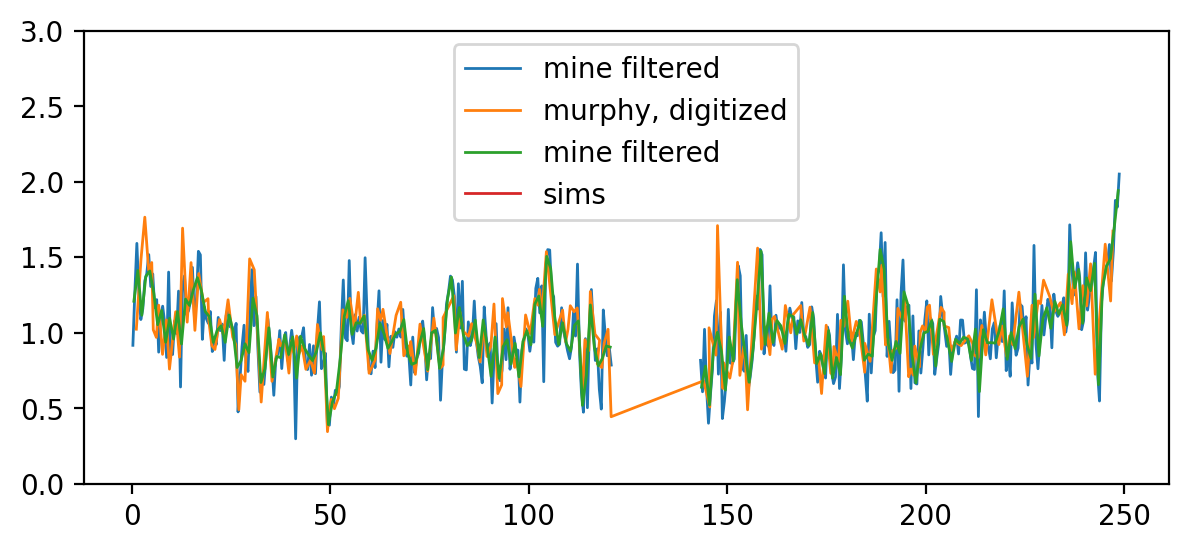

In [106]:
fig, ax = plt.subplots(figsize=(7, 3))

x, y = pi_100kb['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='mine filtered', zorder=3, linewidth=1)
ax.plot(md['pos'], ratio(md['pi']), label='murphy, digitized', linewidth=1, zorder=3)
x, y = pi['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='mine filtered', zorder=3, linewidth=1)

x, y = pi_sims['chr1'].pairs
ax.plot(x/1e6, ratio(y), label='sims', zorder=3, linewidth=1)

ax.legend()
ax.set_ylim(0, 3)


In [93]:
y = gd_sims.bin_pi(1e5, False, False)

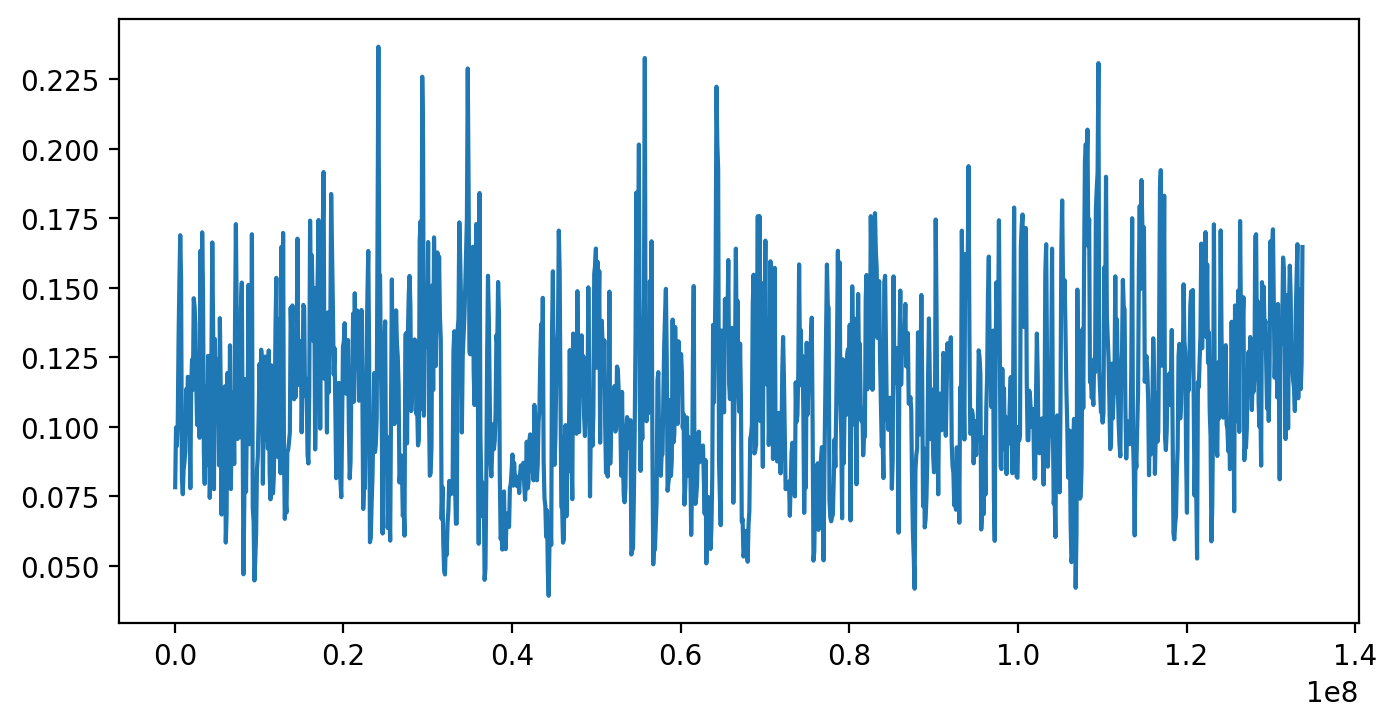

In [96]:
plt.plot(*y[1]['chr10'].pairs)

In [103]:
gd_sims.npoly(False, False)

{'chr1': 0, 'chr10': 1241936}

In [104]:
gd.npoly(False, False)

{'chr1': 228646356}

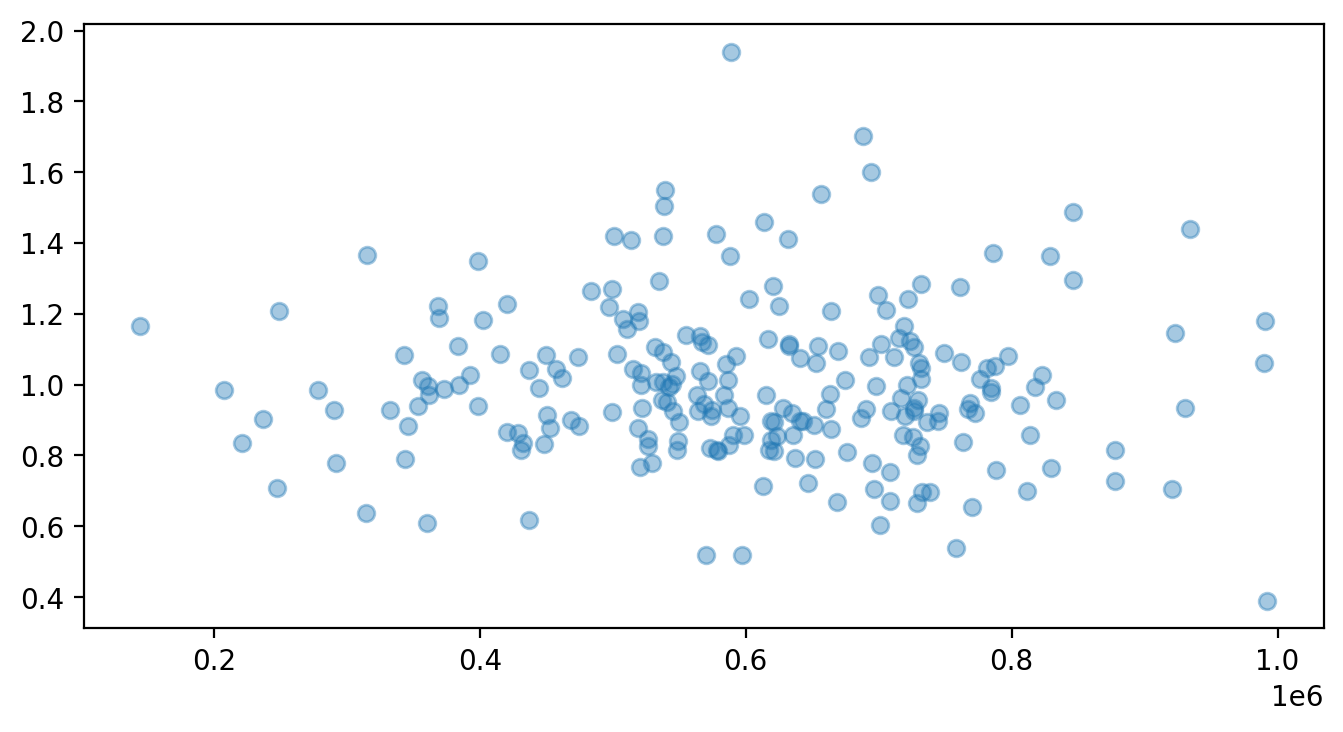

In [67]:
x, y = pi['chr1'].pairs
plt.scatter(pi['chr1'].n[1:], ratio(y), alpha=0.4)


In [19]:
pi_100kb['chr1'].n.shape, y.shape

((499,), (249,))